# UCI Adult Data Set 

The dataset has details of 32561 people with the following 14 features:

[Census Income Dataset](https://archive.ics.uci.edu/ml/datasets/adult)

![](adult.png)

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report , accuracy_score
from sklearn.model_selection import train_test_split
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("adult1.csv")
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### 1.  Explore the data by completing the following tasks?
- How many men and women (sex feature) are represented in this dataset? 

- What is the average age (age feature) of women? 

- What is the percentage of German citizens (native-country feature)?

In [3]:
data['sex'].value_counts()

Male      21790
Female    10771
Name: sex, dtype: int64

In [4]:
d=data[data['sex']=='Female']
print("Average age of women:",d['age'].mean())

Average age of women: 36.85823043357163


In [9]:
data[data['native-country']=='Germany'].shape[0]

137

In [11]:
print("Percentage of Germans:",(len(data[data['native-country']=='Germany']) / len(data))*100)

Percentage of Germans: 0.42074874850281013


### 2. For people who recieve more than 50K per year (salary feature), what is the mean and standard deviation of their age?  Simiarly for people who receive less than 50K per year?

In [12]:
df = data[data['salary'] == '>50K']
print('Mean:',df['age'].mean())
print('Standard Deviation:',df['age'].std())

Mean: 44.24984058155847
Standard Deviation: 10.51902771985177


In [13]:
df = data[data['salary'] == '<=50K']
print('Mean:',df['age'].mean())
print('Standard Deviation:',df['age'].std())

Mean: 36.78373786407767
Standard Deviation: 14.020088490824813


### 3. Display the statistics of age for each gender of all the races (race feature). Use groupby() and describe(). Find the maximum age of men of Amer-Indian-Eskimo race.

In [14]:
stats = data.groupby(['race','sex'])['age']
stats.describe()

count       mean        std   min   25%   50%  \
race               sex                                                       
Amer-Indian-Eskimo Female    119.0  37.117647  13.114991  17.0  27.0  36.0   
                   Male      192.0  37.208333  12.049563  17.0  28.0  35.0   
Asian-Pac-Islander Female    346.0  35.089595  12.300845  17.0  25.0  33.0   
                   Male      693.0  39.073593  12.883944  18.0  29.0  37.0   
Black              Female   1555.0  37.854019  12.637197  17.0  28.0  37.0   
                   Male     1569.0  37.682600  12.882612  17.0  27.0  36.0   
Other              Female    109.0  31.678899  11.631599  17.0  23.0  29.0   
                   Male      162.0  34.654321  11.355531  17.0  26.0  32.0   
White              Female   8642.0  36.811618  14.329093  17.0  25.0  35.0   
                   Male    19174.0  39.652498  13.436029  17.0  29.0  38.0   

                             75%   max  
race               sex                  
Amer-Indian-Eskimo Female  46.00  80.0  
                   Male    45.00  82.0  
Asian-Pac-Islander Female  43.75  75.0  
                   Male    46.00  90.0  
Black              Female  46.00  90.0  
                   Male    46.00  90.0  
Other              Female  39.00  74.0  
                   Male    42.00  77.0  
White              Female  46.00  90.0  
                   Male    49.00  90.0

In [15]:
x = data[data['race'] =='Amer-Indian-Eskimo']
y = x[x['sex'] == 'Male']
print("Maximum Age:",y['age'].max())

Maximum Age: 82


### 4. As computers understand only numbers, we will do some preprocessing tasks for encoding the categorical features.

- Encode Salary column such that wherever we have salary more than 50k that is '>50k' we encode it to 1 else 0. 
- One hot encode the categorical features.
- Split features and target variable into X and y respectively.

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education-num     32561 non-null int64
marital-status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital-gain      32561 non-null int64
capital-loss      32561 non-null int64
hours-per-week    32561 non-null int64
native-country    32561 non-null object
salary            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [17]:
data.loc[data['salary']=='<=50K', 'salary'] = 0
data.loc[data['salary']=='>50K', 'salary'] = 1
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [18]:
from sklearn.preprocessing import LabelEncoder
cat = list(data.select_dtypes(include='object').columns)
label_encoder=LabelEncoder()
for i in cat:
    data[i] = label_encoder.fit_transform(data[i])
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39,0
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0


### 5. Perform the following operation on dataset.
- Split the data X and y into X_train,X_test,y_train and y_test in the ratio 70:30
- Further split the training data into train and validation in 80:20 ratio
- Then apply the base Decision Tree Classifier model and calculate the accuracy on validation data as well as on test data.

In [19]:
X = data.iloc[:,:-1]
y = data['salary']
X.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5


In [20]:
print(y.shape)

(32561,)


In [21]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=42)

In [22]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
tree_predictions = tree.predict(X_test) 
print("Decision tree accuracy: ",accuracy_score(y_test,tree_predictions))

Decision tree accuracy:  0.8087828846350701


In [23]:
x_train,x_val,y_train,y_val = train_test_split(X_train,y_train,test_size=0.30,random_state=42)

In [24]:
tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)
tree_predictions = tree.predict(x_val) 
print("Decision tree accuracy: ",accuracy_score(y_val,tree_predictions))

Decision tree accuracy:  0.8106171395144779


### 6. Perform ensembling using the models Decision Tree Classifier and Logistic Regression, using a VotingClassifier keeping the parameter voting as `soft` and the calculate the accuracy.

In [25]:
from sklearn.ensemble import VotingClassifier
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=42)
log_clf = LogisticRegression()
decision_clf = DecisionTreeClassifier()



voting_clf_soft = VotingClassifier(estimators = [('Logistic Regression',log_clf)],voting = 'soft')
voting_clf_soft.fit(X_train,y_train)
soft_voting_score = voting_clf_soft.score(X_test,y_test)
print("Logistic:",soft_voting_score)


voting_clf_soft = VotingClassifier(estimators =  [('Decision Tree',decision_clf)],voting = 'soft')
voting_clf_soft.fit(X_train,y_train)
soft_voting_score = voting_clf_soft.score(X_test,y_test)
print("Decision Tree: ",soft_voting_score)


Logistic: 0.8070426860477019
Decision Tree:  0.8101136247312929


## What is the Effect of adding more trees

- Train 3 different ensemble classifiers in the form of gradient boosted trees. Train models with 10, 50 and  100 trees.Use the n_estimators parameter in the boosted tree module.

- n-estimators:
    - The number of sequential trees to be modeled 
    - Though GBM is fairly robust at higher number of trees but it can still overfit at a point.

- Let's get sarted with a model with n_estimators = 10 and max_depth=6:


```python
model_10 = GradientBoostingClassifier(n_estimators=10, max_depth=6).fit(X_train, y_train)
```

### 7. Perform the following Boosting task on below two models.

- Train two models with 
```python
A) n_estimators = 50 & max_depth = 6
B) n_estimators =100 & max_depth= 6
```
- Calculate the accuracy on validation data and testing data.

**Things to ponder**

- Which model has the best accuracy on the validation data?
- Is it always true that the model with the most trees will perform best on validation data?

In [26]:
from sklearn.ensemble import GradientBoostingClassifier
model_10 = GradientBoostingClassifier(n_estimators=10, max_depth=6).fit(X_train, y_train)
print("GBC_10:",model_10.score(X_test,y_test))
model_50 = GradientBoostingClassifier(n_estimators=50, max_depth=6).fit(X_train, y_train)
print("GBC_50:",model_50.score(X_test,y_test))
model_100 = GradientBoostingClassifier(n_estimators=100, max_depth=6).fit(X_train, y_train)
print("GBC_100:",model_100.score(X_test,y_test))

GBC_10: 0.8553587880028662
GBC_50: 0.8733749616132664
GBC_100: 0.8738867847271983


### 8. Based on the best gradient boosting classifier you found in the previous task, plot a bar plot of the model's top 10 features with it's feature importance score

(array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 ]),
 <a list of 9 Text xticklabel objects>)

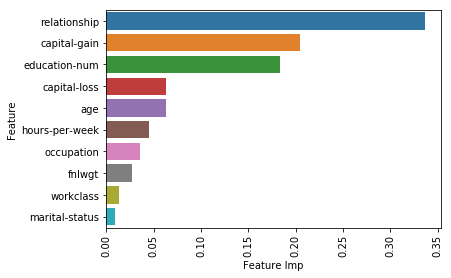

In [28]:
#FeatureIMP = dict(zip(data.columns, model_100.feature_importances_))
#print("Feature importances are:",FeatureIMP)
import seaborn as sns
Feature_Imp = pd.DataFrame(model_100.feature_importances_,columns=['Feature Imp'])
Feature = pd.DataFrame(X.columns,columns=['Feature'])
top_10 = pd.concat([Feature,Feature_Imp],axis=1)
sns.barplot(y="Feature", x="Feature Imp", data=top_10.nlargest(10,'Feature Imp'))
plt.xticks(rotation='vertical')

### 9. Plot the training and testing error vs. number of trees

- Steps to follow:

**Step 1: Calculate the classification error for model on the training data (train_data).**

**Step 2: Store the training errors into a list (called training_errors) that looks like this:**

```python 
[train_err_10, train_err_50, train_err_100]
```
**Step 3: Calculate the classification error of each model on the validation data (validation_data).**

**Step 4: Store the validation classification error into a list (called validation_errors) that looks like this:**

```python
[validation_err_10, validation_err_50,validation_err_100]
```
**Step 5: Calculate the classification error of each model on the test data (test_data).**

**Step 6: Store the testing classification error into a list (called testing_errors) that looks like this:**
```python
[testing_err_10, testing_err_50,testing_err_100]
```

**Things to ponder**

- Does the training error reduce as the number of trees increases?Is it always true that the validation error will reduce as the number of trees increases?

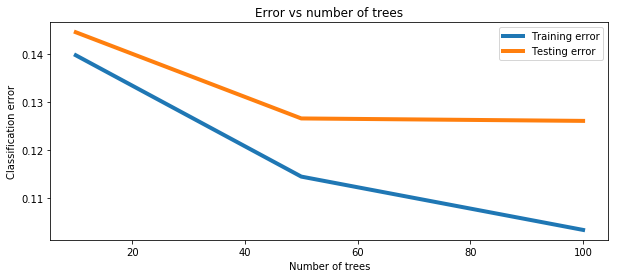

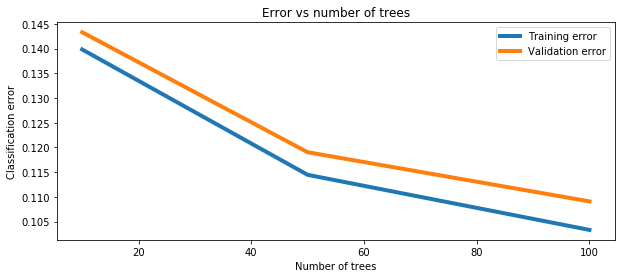

In [30]:
train_err_10 = 1-model_10.score(X_train,y_train)
train_err_50 = 1-model_50.score(X_train,y_train)
train_err_100 = 1-model_100.score(X_train,y_train)

training_errors = [train_err_10, train_err_50, train_err_100]

testing_err_10 = 1-model_10.score(X_test,y_test)
testing_err_50 = 1-model_50.score(X_test,y_test)
testing_err_100 = 1-model_100.score(X_test,y_test)

testing_errors = [testing_err_10, testing_err_50, testing_err_100]

validation_err_10 = 1-model_10.score(x_val,y_val)
validation_err_50 = 1-model_50.score(x_val,y_val)
validation_err_100 = 1-model_100.score(x_val,y_val)

validation_errors = [validation_err_10, validation_err_50, validation_err_100]


plt.figure(figsize=(10,4))
plt.plot([10, 50, 100], training_errors, linewidth=4.0, label='Training error')
plt.plot([10, 50, 100], testing_errors, linewidth=4.0, label='Testing error')
plt.title('Error vs number of trees')
plt.xlabel('Number of trees')
plt.ylabel('Classification error')
plt.legend(["Training error","Testing error"])
plt.show()


plt.figure(figsize=(10,4))
plt.plot([10, 50, 100], training_errors, linewidth=4.0, label='Training error')
plt.plot([10, 50, 100], validation_errors, linewidth=4.0, label='Validation error')
plt.title('Error vs number of trees')
plt.xlabel('Number of trees')
plt.ylabel('Classification error')
plt.legend(["Training error","Validation error"])
plt.show()